#### Starting Kit

To help with the experiments

In [37]:
import cv2
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

def plotter(details, row, columns):
    for i in range(len(details)):
        plt.subplot(row, columns, i + 1)
        plt.imshow(details[i][0], cmap = details[i][2] if len(details[i]) >= 3 else None)
        plt.title(details[i][1] if len(details[i]) >= 2 else "")
        plt.axis("off")

    plt.show()

def applyFilter(image, kernel):
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    return convolve(imageGray, kernel)

def showApplied_X_Y_Diag_Kernels(originalImage, originalImageTitle, filterName, filterKernelX, filterKernelY, filterKernelDiag):   
    plotter([[originalImage, originalImageTitle, "gray"],
            [applyFilter(originalImage, filterKernelX), f"{filterName} X", "gray"],
            [applyFilter(originalImage, filterKernelY), f"{filterName} Y", "gray"],
            [applyFilter(originalImage, filterKernelDiag), f"{filterName} Diagonal", "gray"]], 2, 2)
    
def showAppliedKernel(originalImage, originalImageTitle, filterTitle, filterKernel):
    plotter([[originalImage, originalImageTitle, "gray"],
            [applyFilter(originalImage, filterKernel), f"{filterTitle}", "gray"]], 1, 2)
    
img = cv2.cvtColor(cv2.imread("Ur_Chariot.jpg"), cv2.COLOR_BGR2RGB)
imgBlurred = cv2.GaussianBlur(img, (5, 5), sigmaX=0)
img2Noisy = cv2.cvtColor(cv2.imread("Noise_Salt_and_Pepper.png"), cv2.COLOR_BGR2RGB)

### Experiment 1

Applying Horizontal, Vertical, and Diagonal Sobel Filters.

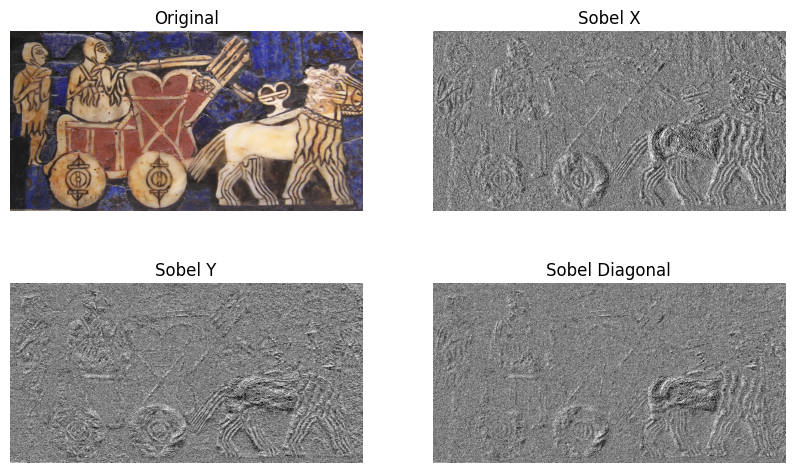

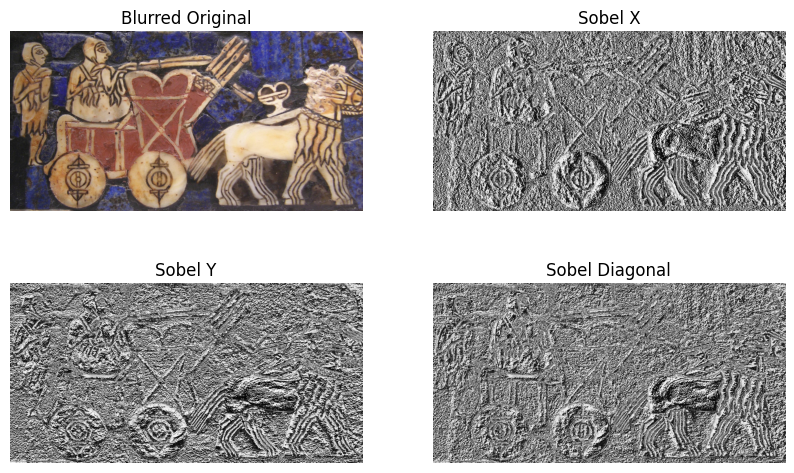

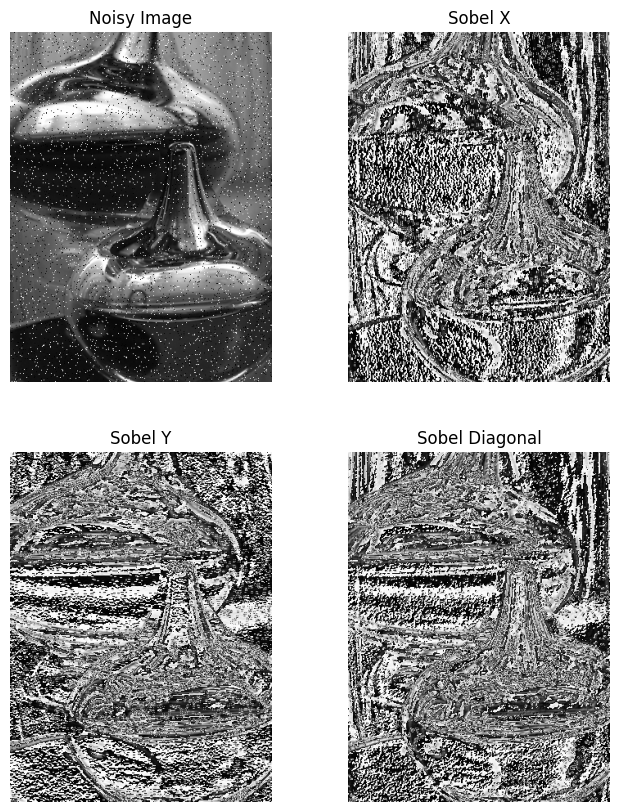

In [38]:
# Sobel kernels from class
sobelX = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobelY = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

sobelDiag = sobelX + sobelY

plt.figure(figsize=(10, 6))
showApplied_X_Y_Diag_Kernels(img, "Original", "Sobel", sobelX, sobelY, sobelDiag)

plt.figure(figsize=(10, 6))
showApplied_X_Y_Diag_Kernels(imgBlurred, "Blurred Original", "Sobel", sobelX, sobelY, sobelDiag)

plt.figure(figsize=(8, 10))
showApplied_X_Y_Diag_Kernels(img2Noisy, "Noisy Image", "Sobel", sobelX, sobelY, sobelDiag)

### Experiment 2

Applying Horizontal, Vertical, and Diagonal Prewitt Filters.

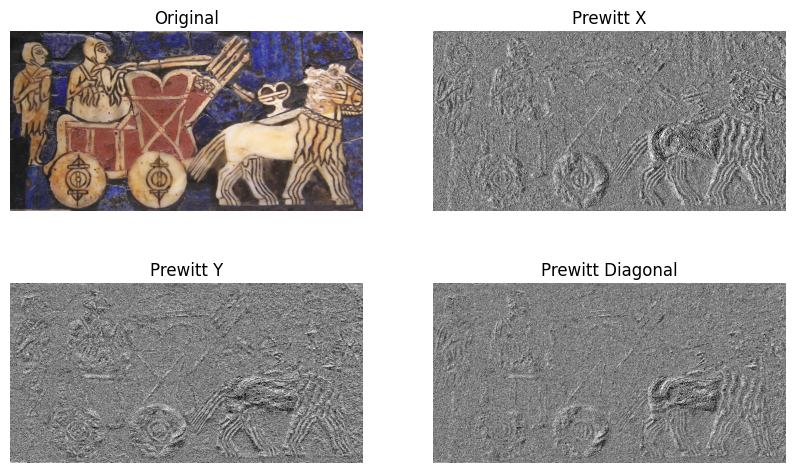

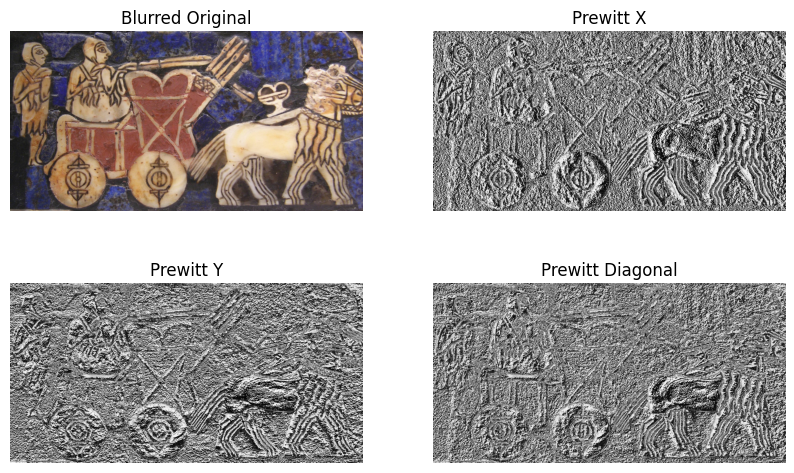

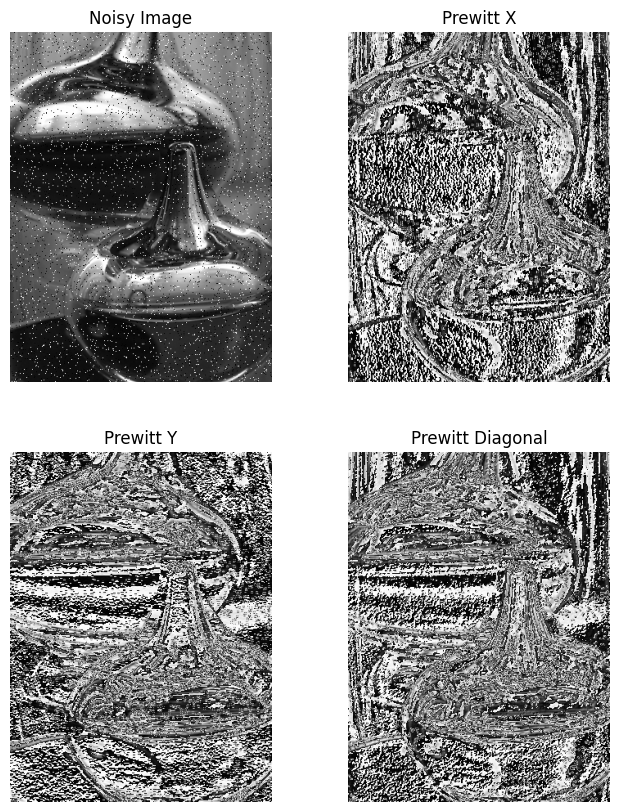

In [ ]:
# Prewitt kernels from class
prewittX = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

prewittY = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

prewittDiag = prewittX + prewittY

plt.figure(figsize=(10, 6))
showApplied_X_Y_Diag_Kernels(img, "Original", "Prewitt", prewittX, prewittY, prewittDiag)

plt.figure(figsize=(10, 6))
showApplied_X_Y_Diag_Kernels(imgBlurred, "Blurred Original", "Prewitt", prewittX, prewittY, prewittDiag)

plt.figure(figsize=(8, 10))
showApplied_X_Y_Diag_Kernels(img2Noisy, "Noisy Image", "Prewitt", prewittX, prewittY, prewittDiag)

### Experiment 3

Applying Laplacian Filter for Edge Detection.

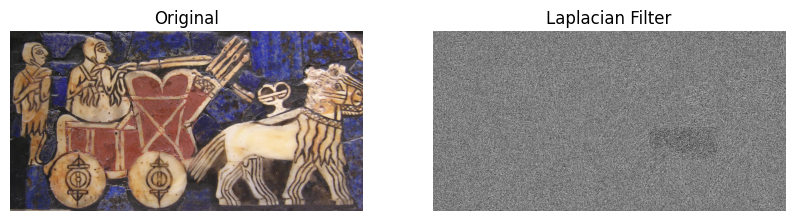

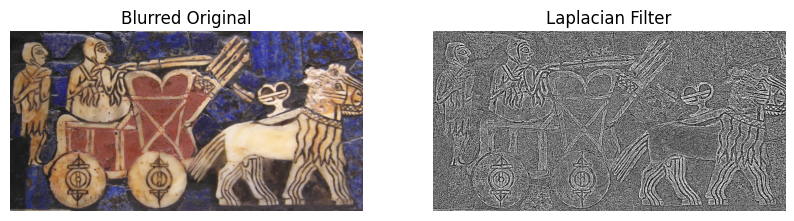

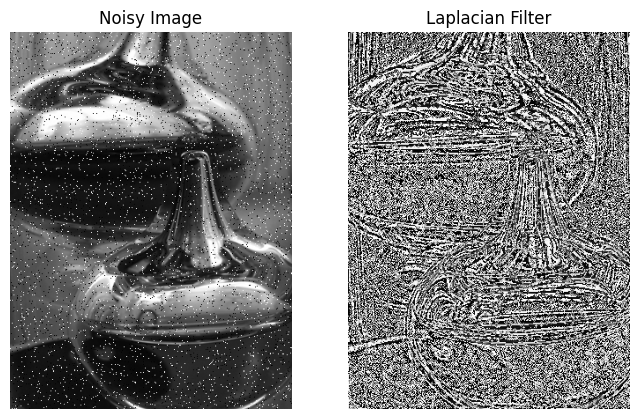

In [ ]:
# Laplacian kernel from class
laplacianKernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

plt.figure(figsize=(10, 6))
showAppliedKernel(img, "Original", "Laplacian Filter", laplacianKernel)

plt.figure(figsize=(10, 6))
showAppliedKernel(imgBlurred, "Blurred Original", "Laplacian Filter", laplacianKernel)

plt.figure(figsize=(8, 10))
showAppliedKernel(img2Noisy, "Noisy Image", "Laplacian Filter", laplacianKernel)